# Playing around with PCA on MNIST data.
stough 202-

We're going look at Principal Component Analysis and the MNIST data today, and an analogy with some of the block transform and image compression stuff we've done before.

## Import 
A lot. We need MNIST data, PCA, and all of our block transform materials.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# For the MNIST data
from torchvision import datasets, transforms
from torchvision.utils import make_grid

# For PCA 
from sklearn.decomposition import PCA

from skimage.util import montage

# For importing some of our own utility codes.
import sys  
sys.path.insert(0, '../dip_utils')

from matrix_utils import (arr_info,
                          make_linmap)
from vis_utils import (vis_rgb_cube,
                       vis_hists,
                       vis_pair)

from wavelet_utils import (make_haar_matrix,
                           make_random_basis,
                           make_klt_basis,
                           make_dct_matrix,
                           make_standard_matrix,
                           vis_blocks)

## Loading and Formatting the MNIST Data

In [2]:
# Thank you: https://www.aiworkbox.com/lessons/load-mnist-dataset-from-pytorch-torchvision
# https://pytorch.org/docs/stable/torchvision/datasets.html
mnist_trainset = datasets.MNIST(root='/home/dip365/data', train=True, download=False, transform=None)
mnist_testset = datasets.MNIST(root='/home/dip365/data', train=False, download=False, transform=None)

x_train = np.stack([np.array(x).ravel() for x,_ in mnist_trainset])
x_test = np.stack([np.array(x).ravel() for x,_ in mnist_testset])
y_train = np.stack([y for _,y in mnist_trainset]).astype('long')
y_test = np.stack([y for _,y in mnist_testset]).astype('long')

# These are Nx784
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0

In [3]:
arr_info(x_train)

((60000, 784), dtype('float32'), 0.0, 1.0)

In [4]:
arr_info(y_train)

((60000,), dtype('int64'), 0, 9)

## PCA 
We'll do a PCA analysis of the MNIST training set to see its power on this kind of data. Let's use [pca_spanFaces](./pca_spanFaces.ipynb) as a guide. Here each row of `x_train` for example represents a $28\times28$ image. PCA won't know anything about that, and will just think we have 60K points in a 784-D space.

In [5]:
# Now get 10 most important 784-d directions in the space of faces.
pca = PCA(n_components=10)
Xp = pca.fit_transform(x_train) # Xp is actually 60Kx20 here, each of the 320 training images is now projected into the 20-d space
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.09704707 0.0709596  0.06169128 0.0538944  0.04868817 0.04312249
 0.03271947 0.02883912 0.02762042 0.02357   ]


In [6]:
imshape = (28,28)

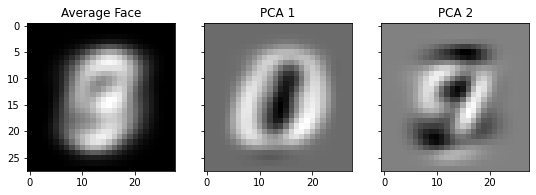

In [7]:
f, ax = plt.subplots(1,3, figsize=(9, 3), sharey=True, sharex=True)
f.canvas.set_window_title('Average Face and Two Pricipal Components')
ax[0].imshow(np.reshape(x_train.mean(axis=0), imshape), cmap='gray')
ax[0].set_title('Average Face')

ax[1].imshow(np.reshape(pca.components_[0,:], imshape), cmap='gray')
ax[1].set_title('PCA 1')

ax[2].imshow(np.reshape(pca.components_[1,:], imshape), cmap='gray')
ax[2].set_title('PCA 2');

In [8]:
# Now scatter some random faces in the pca dimensions.
# Xp from above is already 320 x 10, the 10-pca dimensional
# projection of each image.

# Which images to display is randomized, so that's it's different each time run.
np.random.seed() # Comment out this line to ensure the same images are displayed each run.
whichfaces = np.random.choice(len(x_train)), NUMFACES, replace=False)
xys = Xp[whichfaces, :]


f2, ax2 = plt.subplots(figsize=(5,5))
f2.canvas.set_window_title('Face PCA Projection Scatter')

"""
How to scatter images in a plot, instead of points for example:
https://matplotlib.org/examples/pylab_examples/demo_annotation_box.html
Also useful:
https://stackoverflow.com/questions/22566284/matplotlib-how-to-plot-images-instead-of-points?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
and:
https://stackoverflow.com/questions/48896088/matplotlib-plotting-images-instead-of-points-stretches-images
"""
for i, xy in zip(whichfaces, xys):
    arr_img = np.reshape(x_train[i, :], imshape)

    imagebox = OffsetImage(arr_img, zoom=0.4, cmap='gray')
    imagebox.image.axes = ax2

    # xy is 10-d here, just need the first 2 to plot though.
    ab = AnnotationBbox(imagebox, xy[:2],
                        pad=0.2,
                        ) # view each image at their specific location

    ax2.add_artist(ab)

ax2.set_xlim(xys[:,0].min(), xys[:,0].max())
ax2.set_ylim(xys[:,1].min(), xys[:,1].max())
plt.show()

SyntaxError: invalid syntax (<ipython-input-8-0ca66e9b6a2f>, line 7)

## Thinking about PCA as a pattern basis,
like we did with block transforms and image compression.

In [ ]:
H = make_klt_basis(np.reshape(x_train[1], (28,28)), size=28)

In [ ]:
vis_blocks(H)